In [11]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

# Load the dataset
file_path = '/content/IMDB Dataset.csv'
df = pd.read_csv(file_path)

# Exploring the dataset
print(df.head())

# Check for missing values
df.isnull().sum()

# Data preprocessing
import re
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000)  # Use top 10,000 words
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

# Pad sequences to the same length
max_len = 100  # Limiting to 100 words per review
X = pad_sequences(sequences, maxlen=max_len)

# Convert the sentiment to numerical labels (0 = negative, 1 = positive)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y = to_categorical(df['sentiment'], num_classes=2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(128, return_sequences=False))  # LSTM layer (better than SimpleRNN for text data)
model.add(Dense(2, activation='softmax'))  # Output layer (binary classification)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Test on some new reviews
sample_review = ["The movie was fantastic! I really loved it."]
sample_sequence = tokenizer.texts_to_sequences(sample_review)
sample_padded = pad_sequences(sample_sequence, maxlen=max_len)
prediction = model.predict(sample_padded)
print("Sentiment:", "Positive" if np.argmax(prediction) == 1 else "Negative")


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 229s 180ms/step - accuracy: 0.7684 - loss: 0.4644 - val_accuracy: 0.8604 - val_loss: 0.3239
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 267s 184ms/step - accuracy: 0.9011 - loss: 0.2502 - val_accuracy: 0.8692 - val_loss: 0.3061
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 226s 181ms/step - accuracy: 0.9357 - loss: 0.1711 - val_accuracy: 0.8522 - val_loss: 0.4217
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 259s 179ms/step - accuracy: 0.9548 - loss: 0.1276 - val_accuracy: 0.8510 - val_loss: 0.3931
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 250s 169ms/step - accuracy: 0.9693 - loss: 0.0885 - val_accuracy: 0.8599 - val_loss: 0.4740
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8638 - loss: 0.4594
Test Accuracy: 0.86
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Sentiment: Positive


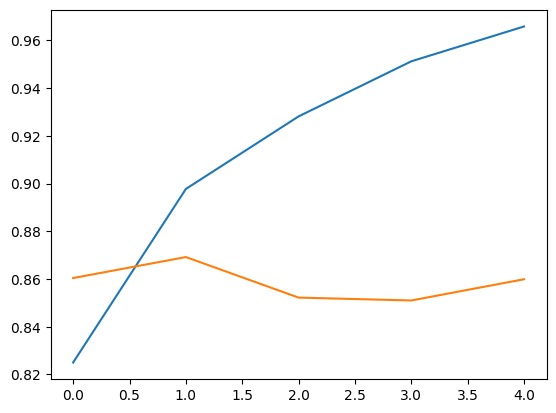

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [12]:
sample_review = ["The script lacked plot development and cinematography was also bad."]
sample_sequence = tokenizer.texts_to_sequences(sample_review)
sample_padded = pad_sequences(sample_sequence, maxlen=max_len)
prediction = model.predict(sample_padded)
print("Sentiment:", "Positive" if np.argmax(prediction) == 1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Sentiment: Negative


In [13]:
sample_review = ["Above Average Movie overall, but got boring in between and action sequences can be better."]
sample_sequence = tokenizer.texts_to_sequences(sample_review)
sample_padded = pad_sequences(sample_sequence, maxlen=max_len)
prediction = model.predict(sample_padded)
print("Sentiment:", "Positive" if np.argmax(prediction) == 1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sentiment: Negative


In [15]:
sample_review = ["Plot was great, it maintained the suspence till the end, finally a great movie!!!"]
sample_sequence = tokenizer.texts_to_sequences(sample_review)
sample_padded = pad_sequences(sample_sequence, maxlen=max_len)
prediction = model.predict(sample_padded)
print("Sentiment:", "Positive" if np.argmax(prediction) == 1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sentiment: Positive
